In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
dft = pd.read_csv(r"C:\Users\basde\Documents\GitHub\Code-and-examples\Projects\Binary Classification with a Bank Dataset\train.csv")
dfo = pd.read_csv(r"C:\Users\basde\Documents\GitHub\Code-and-examples\Projects\Binary Classification with a Bank Dataset\bank-full.csv", delimiter=';')

In [3]:
dfo['y'] = dfo['y'].map({'no' : 0, 'yes': 1})


In [4]:
df = pd.concat([dft, dfo])
df = df.drop(['id'], axis=1)

In [5]:
df['y'].value_counts()

y
0    699434
1     95777
Name: count, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 795211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   age        795211 non-null  int64 
 1   job        795211 non-null  object
 2   marital    795211 non-null  object
 3   education  795211 non-null  object
 4   default    795211 non-null  object
 5   balance    795211 non-null  int64 
 6   housing    795211 non-null  object
 7   loan       795211 non-null  object
 8   contact    795211 non-null  object
 9   day        795211 non-null  int64 
 10  month      795211 non-null  object
 11  duration   795211 non-null  int64 
 12  campaign   795211 non-null  int64 
 13  pdays      795211 non-null  int64 
 14  previous   795211 non-null  int64 
 15  poutcome   795211 non-null  object
 16  y          795211 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 109.2+ MB


In [7]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


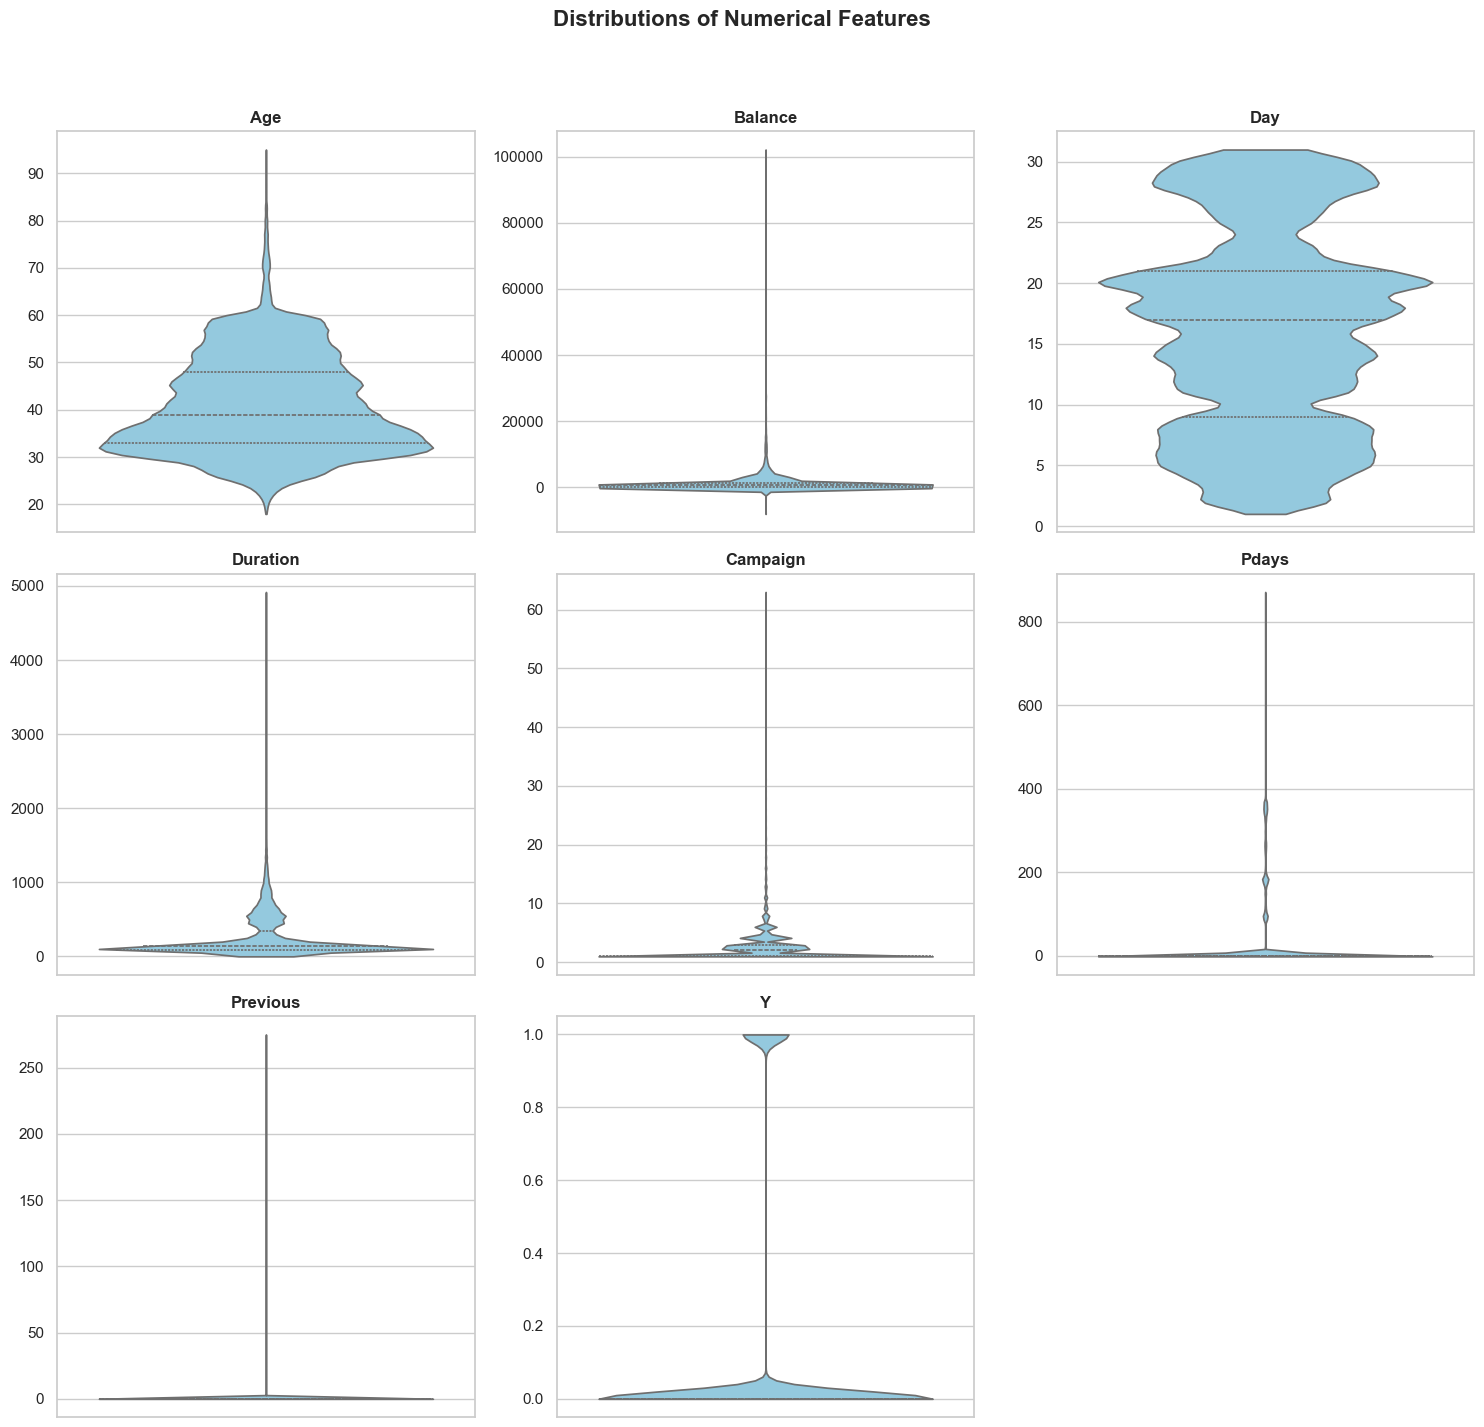

In [8]:
import math
sns.set_theme(style="whitegrid")

numeric_cols = df.select_dtypes(include=np.number).columns

if numeric_cols.empty:
    print("No numerical columns found to plot.")
else:
    n_features = len(numeric_cols)
    n_cols = 3
    n_rows = math.ceil(n_features / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    
    # Flatten the axes array for easy iteration, handling single-plot case
    if n_features > 1:
        axes = axes.flatten()
    else:
        axes = [axes]

    for ax, col in zip(axes, numeric_cols):
        # Create a violin plot for each column on its respective axis
        sns.violinplot(y=df[col], ax=ax, cut=0, inner='quartile', color='skyblue')
        ax.set_title(col.replace('_', ' ').capitalize(), weight='bold')
        ax.set_ylabel('') # The y-axis is the value, no need for a label
        ax.set_xlabel('') # The x-axis has no meaning for a single violin

    # Hide any unused subplots
    for i in range(n_features, len(axes)):
        axes[i].set_visible(False)

    fig.suptitle('Distributions of Numerical Features', fontsize=16, weight='bold')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

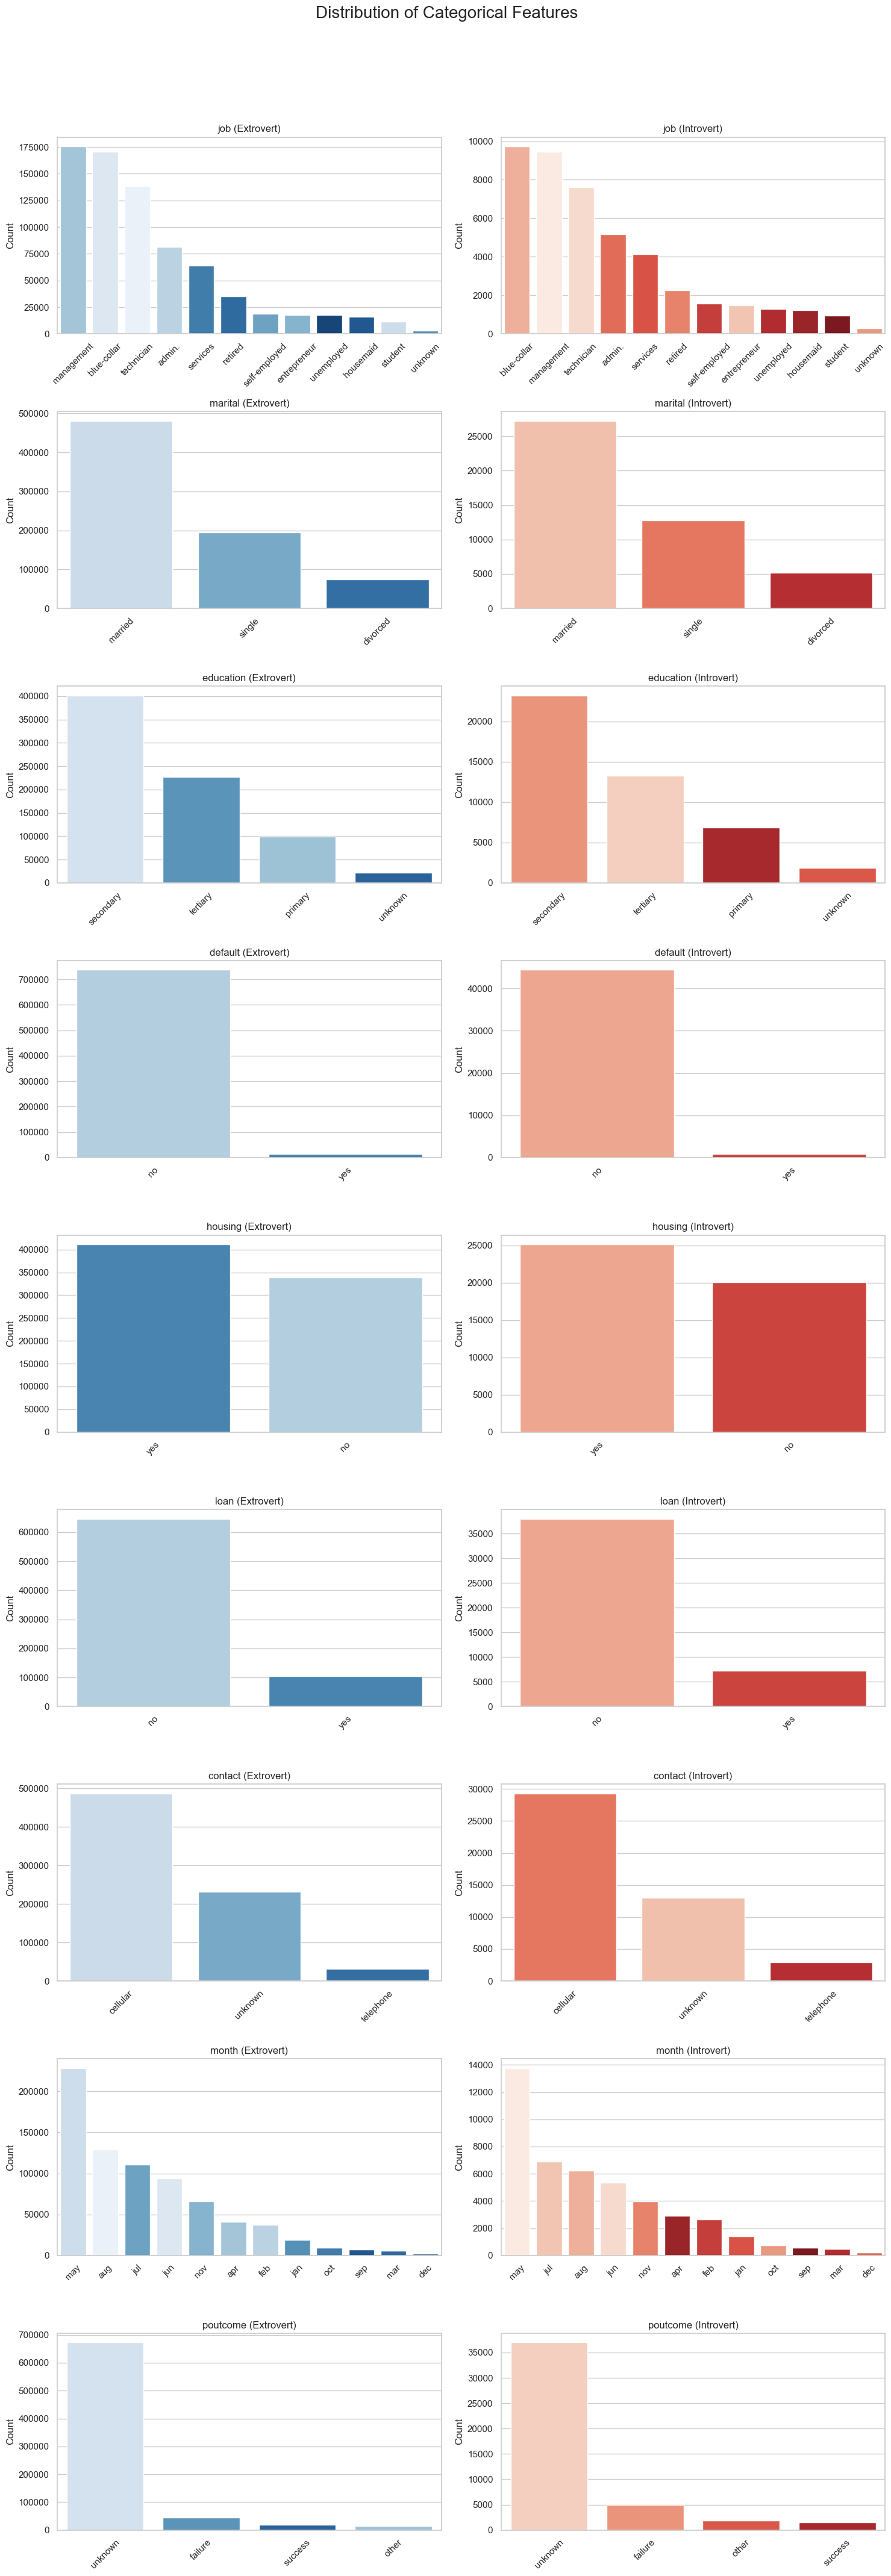

In [9]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Create a figure and a grid of subplots.
fig, axes = plt.subplots(nrows=len(categorical_cols), ncols=2, figsize=(15, len(categorical_cols) * 5), squeeze=False)

# Add a main title to the entire figure
fig.suptitle('Distribution of Categorical Features', fontsize=20)

# Loop through each categorical column and create a count plot
for i, col in enumerate(categorical_cols):
    # --- Left Plot: Extrovert Dataframe (dft) ---
    ax_left = axes[i, 0]
    # Handle NaN values by filling with a placeholder
    series_extrovert = dft[col].fillna('Missing')
    # Create plot order based on value counts
    order_extrovert = series_extrovert.value_counts().index
    # Assigning x to hue and setting legend=False to avoid FutureWarning
    sns.countplot(x=series_extrovert, ax=ax_left, hue=series_extrovert, palette="Blues", order=order_extrovert, legend=False)
    ax_left.set_title(f'{col} (Extrovert)')
    ax_left.set_xlabel('')
    ax_left.set_ylabel('Count')
    ax_left.tick_params(axis='x', rotation=45)

    # --- Right Plot: Introvert Dataframe (dfo) ---
    ax_right = axes[i, 1]
    # Handle NaN values by filling with a placeholder
    series_introvert = dfo[col].fillna('Missing')
    # Create plot order based on value counts
    order_introvert = series_introvert.value_counts().index
    # Assigning x to hue and setting legend=False to avoid FutureWarning
    sns.countplot(x=series_introvert, ax=ax_right, hue=series_introvert, palette="Reds", order=order_introvert, legend=False)
    ax_right.set_title(f'{col} (Introvert)')
    ax_right.set_xlabel('')
    ax_right.set_ylabel('Count')
    ax_right.tick_params(axis='x', rotation=45)

# Adjust layout to prevent titles and labels from overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Display the plots
plt.show()

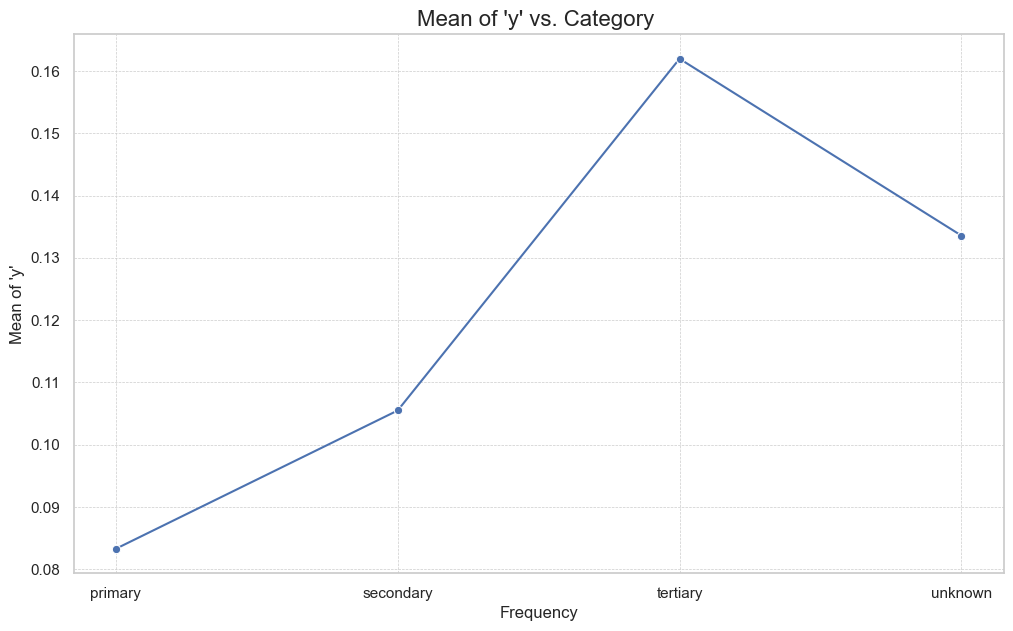

In [10]:

# Group by the calculated frequency and compute the mean of the target 'y'
# This shows the average outcome for jobs of a certain frequency
mean_y_by_group = df.groupby('education')['y'].mean()

# Plot the relationship
plt.figure(figsize=(12, 7))
sns.lineplot(x=mean_y_by_group.index, y=mean_y_by_group.values, marker='o')

plt.title("Mean of 'y' vs. Category ", fontsize=16)
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Mean of 'y'", fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


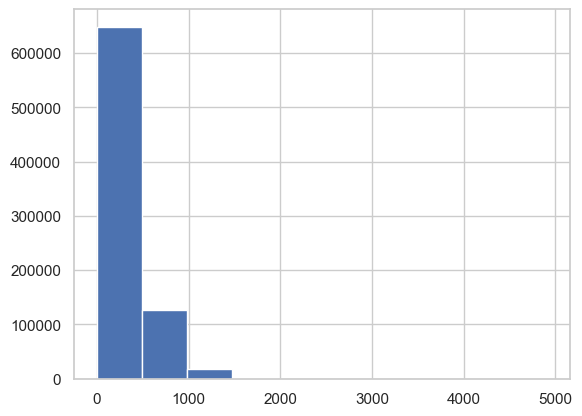

np.float64(2.102150577854662)

In [11]:
plt.hist(df['duration'])
plt.show() 
df['duration'].skew()


In [12]:
df['duration'].kurt()

np.float64(6.978781045769387)

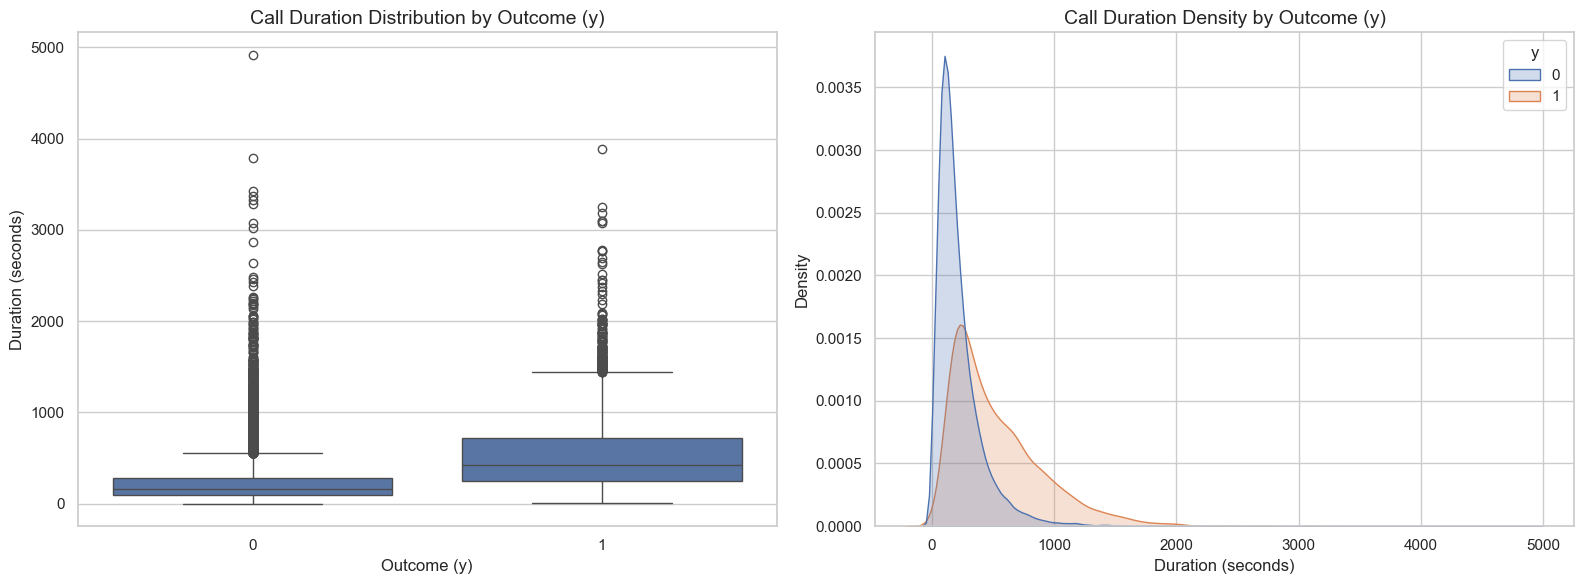

In [13]:
# Set up the matplotlib figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Plot 1: Box Plot ---
# This plot shows the distribution of 'duration' for each category of 'y'.
# It's great for comparing medians and identifying outliers.
sns.boxplot(ax=axes[0], x='y', y='duration', data=dfo)
axes[0].set_title('Call Duration Distribution by Outcome (y)', fontsize=14)
axes[0].set_xlabel('Outcome (y)', fontsize=12)
axes[0].set_ylabel('Duration (seconds)', fontsize=12)

# --- Plot 2: Kernel Density Estimate (KDE) Plot ---
# This plot shows the probability density of 'duration' for each outcome.
# It helps visualize the shape and overlap of the distributions.
sns.kdeplot(ax=axes[1], data=dfo, x='duration', hue='y', fill=True, common_norm=False)
axes[1].set_title('Call Duration Density by Outcome (y)', fontsize=14)
axes[1].set_xlabel('Duration (seconds)', fontsize=12)
axes[1].set_ylabel('Density', fontsize=12)

# Display the plots
plt.tight_layout()
plt.show()

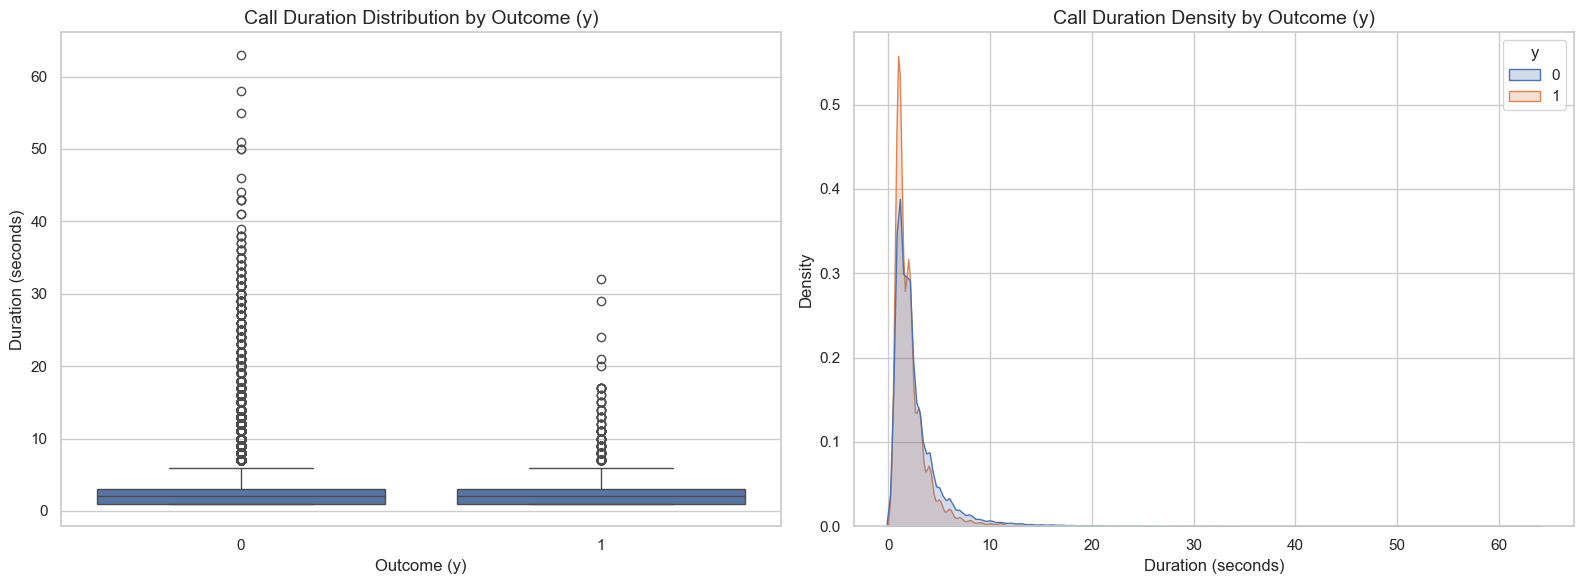

In [14]:
# Set up the matplotlib figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Plot 1: Box Plot ---
# This plot shows the distribution of 'duration' for each category of 'y'.
# It's great for comparing medians and identifying outliers.
sns.boxplot(ax=axes[0], x='y', y='campaign', data=dfo)
axes[0].set_title('Call Duration Distribution by Outcome (y)', fontsize=14)
axes[0].set_xlabel('Outcome (y)', fontsize=12)
axes[0].set_ylabel('Duration (seconds)', fontsize=12)

# --- Plot 2: Kernel Density Estimate (KDE) Plot ---
# This plot shows the probability density of 'duration' for each outcome.
# It helps visualize the shape and overlap of the distributions.
sns.kdeplot(ax=axes[1], data=dfo, x='campaign', hue='y', fill=True, common_norm=False)
axes[1].set_title('Call Duration Density by Outcome (y)', fontsize=14)
axes[1].set_xlabel('Duration (seconds)', fontsize=12)
axes[1].set_ylabel('Density', fontsize=12)

# Display the plots
plt.tight_layout()
plt.show()

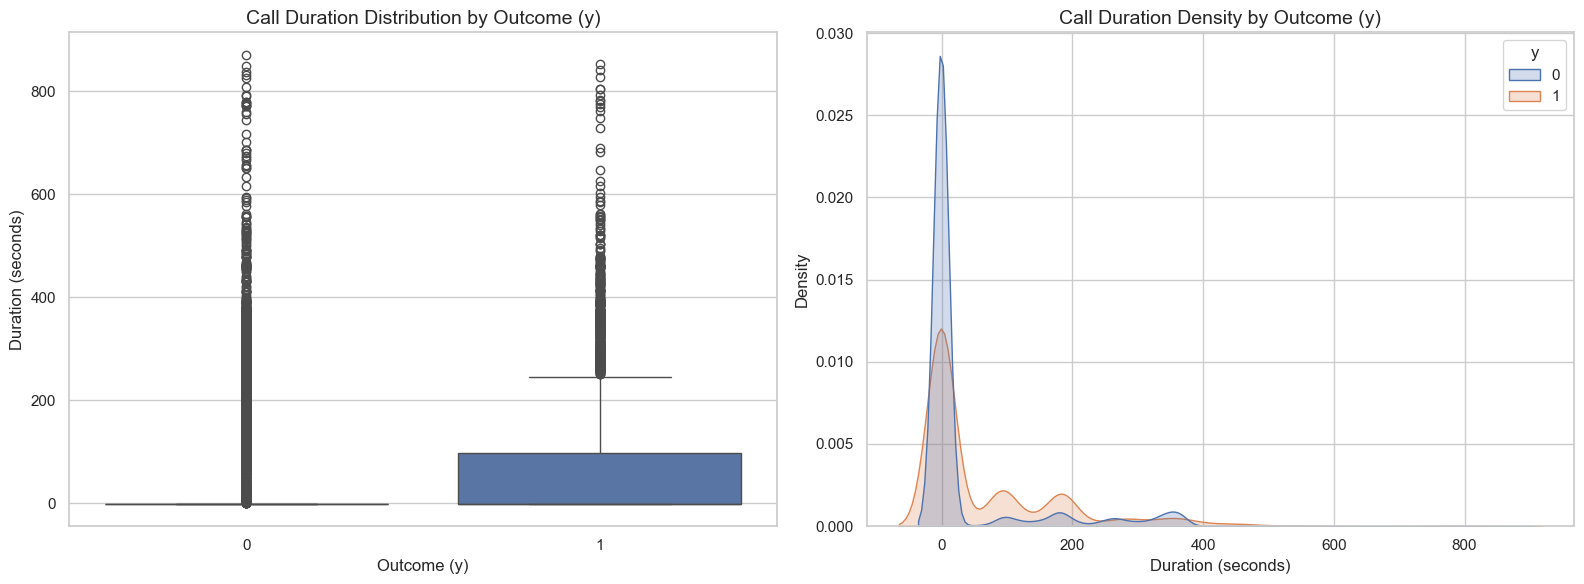

In [15]:
# Set up the matplotlib figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Plot 1: Box Plot ---
# This plot shows the distribution of 'duration' for each category of 'y'.
# It's great for comparing medians and identifying outliers.
sns.boxplot(ax=axes[0], x='y', y='pdays', data=dfo)
axes[0].set_title('Call Duration Distribution by Outcome (y)', fontsize=14)
axes[0].set_xlabel('Outcome (y)', fontsize=12)
axes[0].set_ylabel('Duration (seconds)', fontsize=12)

# --- Plot 2: Kernel Density Estimate (KDE) Plot ---
# This plot shows the probability density of 'duration' for each outcome.
# It helps visualize the shape and overlap of the distributions.
sns.kdeplot(ax=axes[1], data=dfo, x='pdays', hue='y', fill=True, common_norm=False)
axes[1].set_title('Call Duration Density by Outcome (y)', fontsize=14)
axes[1].set_xlabel('Duration (seconds)', fontsize=12)
axes[1].set_ylabel('Density', fontsize=12)

# Display the plots
plt.tight_layout()
plt.show()

In [16]:
percentage = df.loc[df['pdays'] == -1, 'y'].mean() * 100

# Print the result formatted as a percentage
print(f"Percentage of 'y' being 1 when pdays = -1: {percentage:.2f}%")

Percentage of 'y' being 1 when pdays = -1: 10.14%


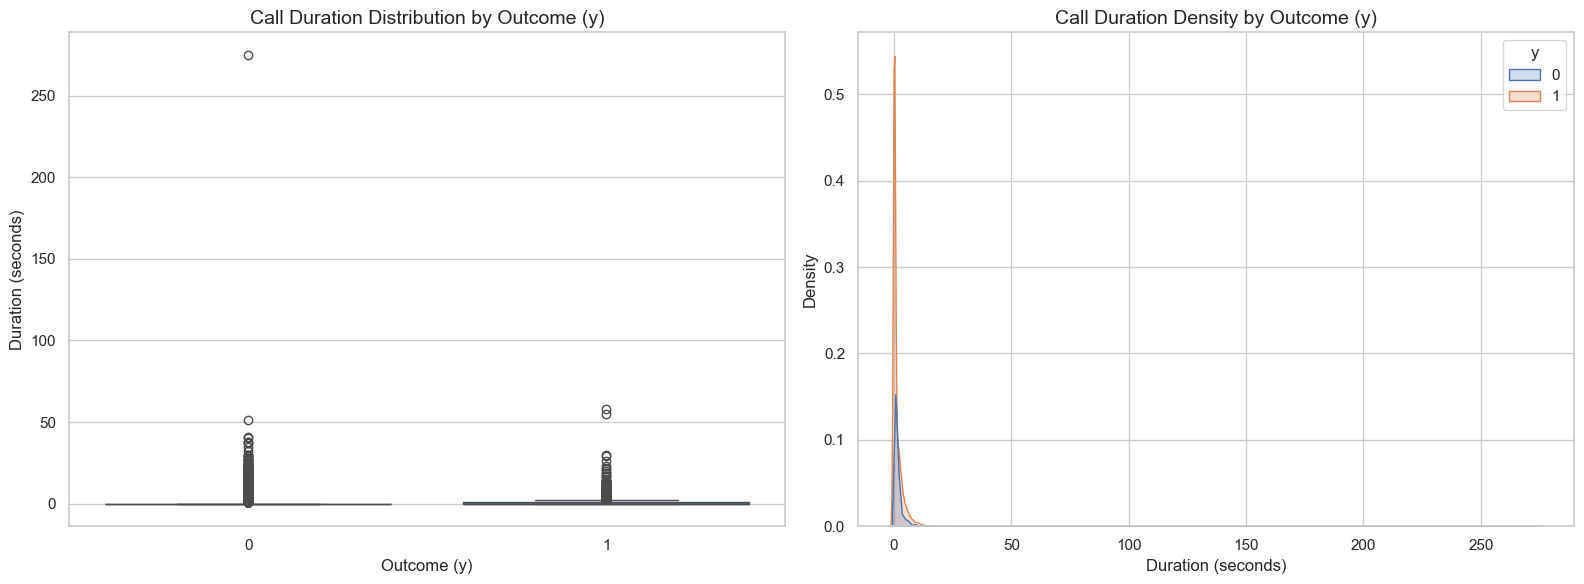

In [17]:
# Set up the matplotlib figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Plot 1: Box Plot ---
# This plot shows the distribution of 'duration' for each category of 'y'.
# It's great for comparing medians and identifying outliers.
sns.boxplot(ax=axes[0], x='y', y='previous', data=dfo)
axes[0].set_title('Call Duration Distribution by Outcome (y)', fontsize=14)
axes[0].set_xlabel('Outcome (y)', fontsize=12)
axes[0].set_ylabel('Duration (seconds)', fontsize=12)

# --- Plot 2: Kernel Density Estimate (KDE) Plot ---
# This plot shows the probability density of 'duration' for each outcome.
# It helps visualize the shape and overlap of the distributions.
sns.kdeplot(ax=axes[1], data=dfo, x='previous', hue='y', fill=True, common_norm=False)
axes[1].set_title('Call Duration Density by Outcome (y)', fontsize=14)
axes[1].set_xlabel('Duration (seconds)', fontsize=12)
axes[1].set_ylabel('Density', fontsize=12)

# Display the plots
plt.tight_layout()
plt.show()

In [18]:
from sklearn.preprocessing import OneHotEncoder

In [19]:
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_cols = pd.DataFrame(ohe.fit_transform(df[['job']]), columns=ohe.get_feature_names_out(['job']), index=df.index)
df = pd.concat([df.drop('job', axis=1), encoded_cols], axis=1)

In [20]:
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_cols = pd.DataFrame(ohe.fit_transform(df[['marital']]), columns=ohe.get_feature_names_out(['marital']), index=df.index)
df = pd.concat([df.drop('marital', axis=1), encoded_cols], axis=1)

In [21]:
from sklearn.preprocessing import OrdinalEncoder

In [22]:
category_order = ['primary', 'secondary', 'unknown', 'tertiary']

In [23]:
ordinal_encoder = OrdinalEncoder(categories=[category_order])
df['education'] = ordinal_encoder.fit_transform(df[['education']])

In [24]:
df.columns

Index(['age', 'education', 'default', 'balance', 'housing', 'loan', 'contact',
       'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single'],
      dtype='object')

In [25]:
pd.get_dummies(df['default'], drop_first=True)
pd.get_dummies(df['housing'], drop_first=True)
pd.get_dummies(df['loan'], drop_first=True)

,yes
0,False
1,False
2,False
3,False
4,False
...,...
45206,False
45207,False
45208,False
45209,False


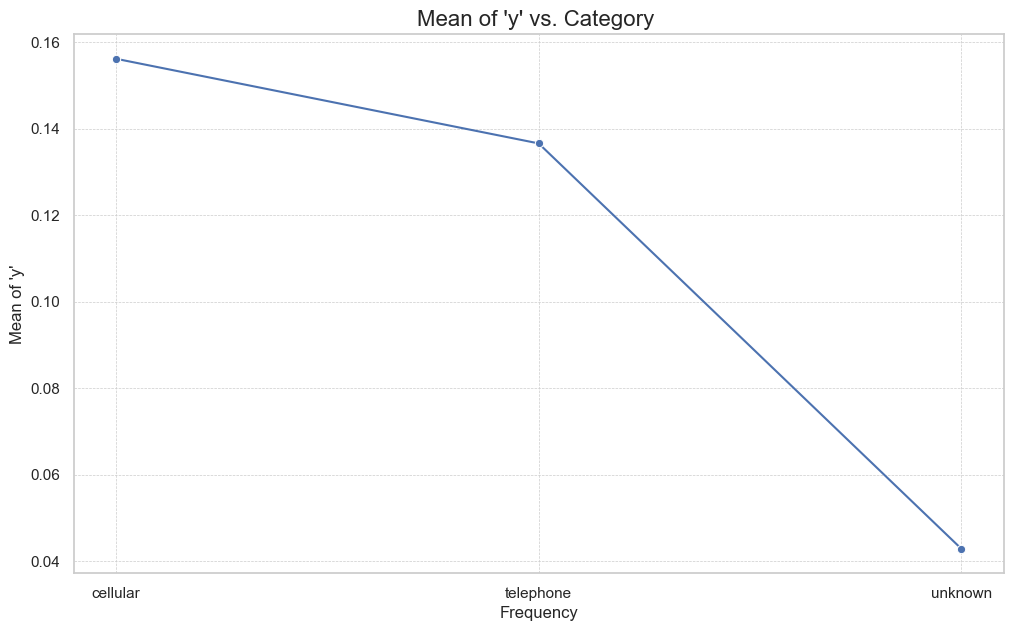

In [26]:

# Group by the calculated frequency and compute the mean of the target 'y'
# This shows the average outcome for jobs of a certain frequency
mean_y_by_group = df.groupby('contact')['y'].mean()

# Plot the relationship
plt.figure(figsize=(12, 7))
sns.lineplot(x=mean_y_by_group.index, y=mean_y_by_group.values, marker='o')

plt.title("Mean of 'y' vs. Category ", fontsize=16)
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Mean of 'y'", fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


In [27]:
df['contact'].value_counts()

contact
cellular     515940
unknown      244647
telephone     34624
Name: count, dtype: int64

In [28]:
df['contact'] = df['contact'].map({'telephone': 'cellular', 'unknown' : 'unknown', 'telephone' : 'telephone'})
pd.get_dummies(df['contact'], drop_first=True)

,unknown
0,False
1,True
2,True
3,True
4,False
...,...
45206,False
45207,False
45208,False
45209,False


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 795211 entries, 0 to 45210
Data columns (total 30 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   age                795211 non-null  int64  
 1   education          795211 non-null  float64
 2   default            795211 non-null  object 
 3   balance            795211 non-null  int64  
 4   housing            795211 non-null  object 
 5   loan               795211 non-null  object 
 6   contact            279271 non-null  object 
 7   day                795211 non-null  int64  
 8   month              795211 non-null  object 
 9   duration           795211 non-null  int64  
 10  campaign           795211 non-null  int64  
 11  pdays              795211 non-null  int64  
 12  previous           795211 non-null  int64  
 13  poutcome           795211 non-null  object 
 14  y                  795211 non-null  int64  
 15  job_admin.         795211 non-null  float64
 16  job_blue

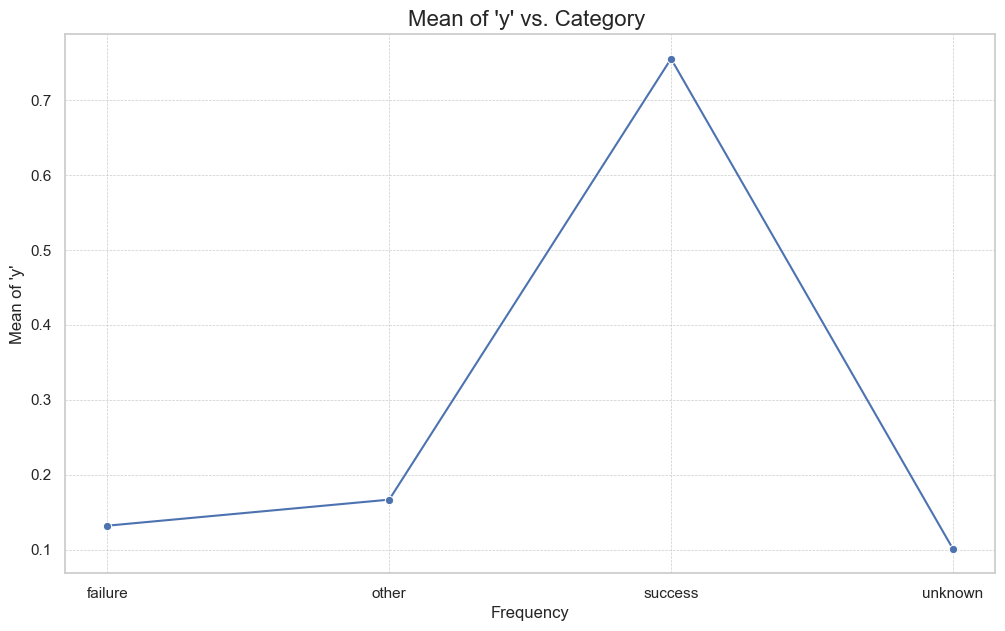

In [30]:

# Group by the calculated frequency and compute the mean of the target 'y'
# This shows the average outcome for jobs of a certain frequency
mean_y_by_group = df.groupby('poutcome')['y'].mean()

# Plot the relationship
plt.figure(figsize=(12, 7))
sns.lineplot(x=mean_y_by_group.index, y=mean_y_by_group.values, marker='o')

plt.title("Mean of 'y' vs. Category ", fontsize=16)
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Mean of 'y'", fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


In [33]:
df['poutcome'] = df['poutcome'].map({'failure': '0', 'other' : '0', 'unknown' : '0', 'succes' : '1'})

In [34]:
df['month'].unique()

array(['aug', 'jun', 'may', 'feb', 'apr', 'nov', 'jul', 'jan', 'oct',
       'mar', 'sep', 'dec'], dtype=object)

In [35]:
df['day'].unique()

array([25, 18, 14, 28,  3, 20, 21, 31,  4,  8,  5, 24, 11, 12, 26, 30,  6,
       10, 19, 17,  2, 13, 29, 23, 27,  7,  9, 16,  1, 22, 15])

DataFrame after month conversion:
   age  education default  balance housing loan  contact  day month  duration  \
0   42        1.0      no        7      no   no      NaN   25    08       117   
1   38        1.0      no      514      no   no  unknown   18    06       185   
2   36        1.0      no      602     yes   no  unknown   14    05       111   
3   27        1.0      no       34     yes   no  unknown   28    05        10   
4   26        1.0      no      889     yes   no      NaN    3    02       902   

   ...  job_retired  job_self-employed  job_services job_student  \
0  ...          0.0                0.0           0.0         0.0   
1  ...          0.0                0.0           0.0         0.0   
2  ...          0.0                0.0           0.0         0.0   
3  ...          0.0                0.0           0.0         1.0   
4  ...          0.0                0.0           0.0         0.0   

   job_technician  job_unemployed  job_unknown  marital_divorced  \
0 

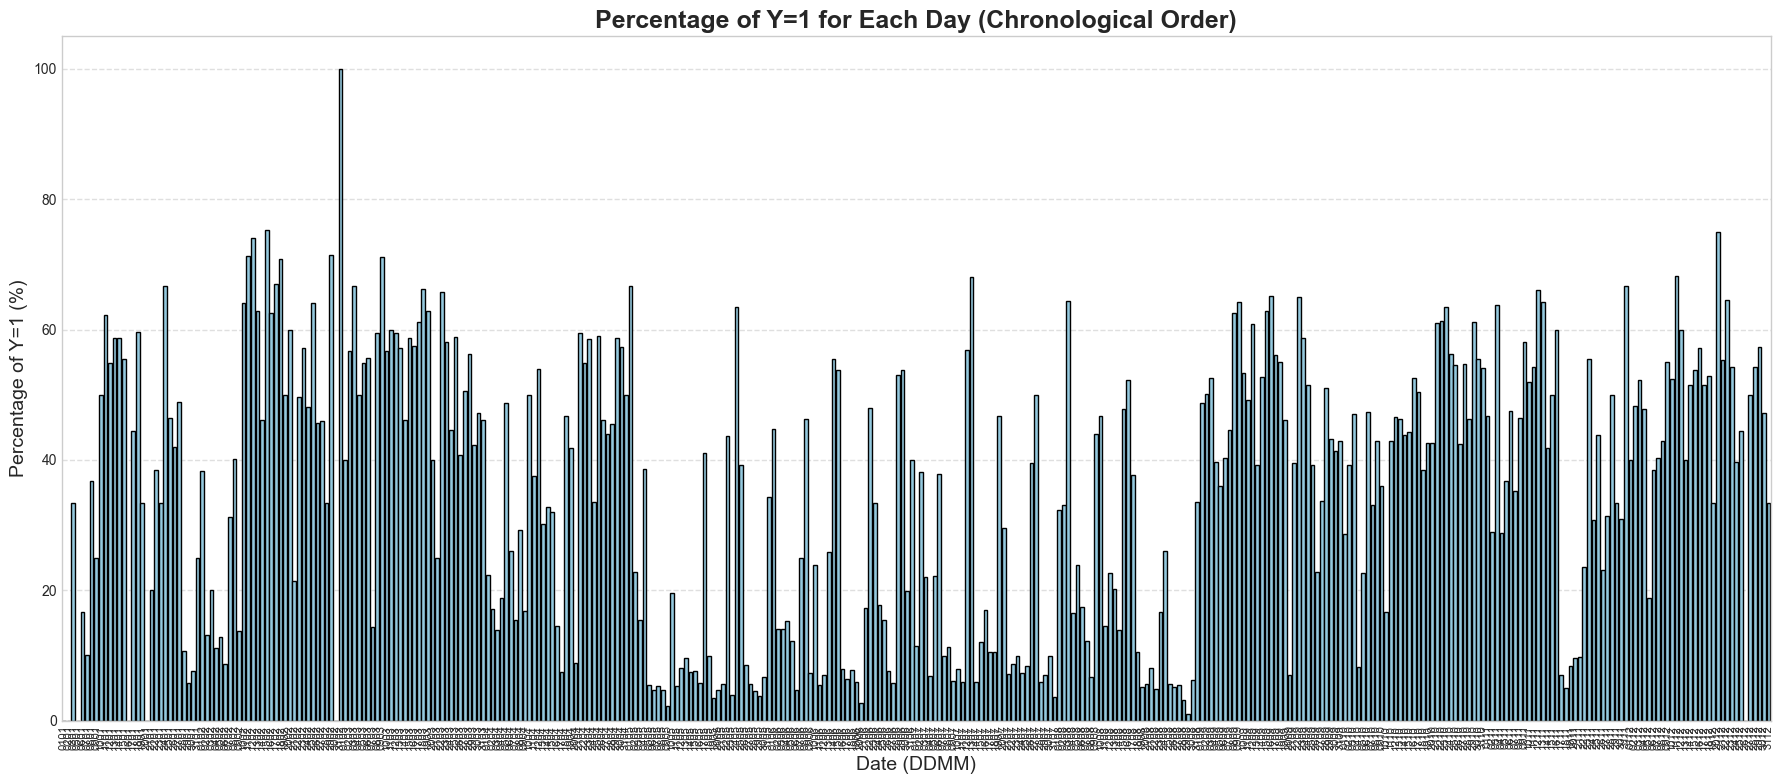


Visualization has been generated.


In [37]:
month_map = {
    'jan': '01', 'feb': '02', 'mar': '03', 'apr': '04', 'may': '05', 'jun': '06',
    'jul': '07', 'aug': '08', 'sep': '09', 'oct': '10', 'nov': '11', 'dec': '12'
}
# Apply the mapping to the 'month' column
df['month'] = df['month'].map(month_map)
print("DataFrame after month conversion:")
print(df.head())
print("\n" + "="*30 + "\n")


# 2. Add leading zeros to the 'day' column for values less than 10
print("Step 2: Padding day numbers with a leading zero...")
# Convert the 'day' column to string type and pad with a leading zero if needed
df['day'] = df['day'].astype(str).str.zfill(2)
print("DataFrame after day padding:")
print(df.head())
print("\n" + "="*30 + "\n")


# 3. Create a new 'date' column by concatenating day and month
print("Step 3: Creating a 'date' column in 'DDMM' format...")
# To ensure chronological sorting later, it's better to create a 'MMDD' format.
# Let's create the date as 'day' + 'month' as requested.
df['date'] = df['day'] + df['month']

# For correct chronological sorting, we will create a temporary sort key.
# A date in 'MMDD' format can be sorted alphabetically.
df['sort_key'] = df['month'] + df['day']

print("DataFrame with new 'date' and 'sort_key' columns:")
print(df.head())
print("\n" + "="*30 + "\n")


# 4. Create a visualization of the percentage of y=1 for each day
print("Step 4: Preparing data and creating the visualization...")
# Group by the date and calculate the mean of 'y'. Since 'y' is binary (0 or 1),
# the mean is the proportion (or percentage) of 1s.
daily_percentage = df.groupby(['sort_key', 'date'])['y'].mean().reset_index()
daily_percentage['y'] = daily_percentage['y'] * 100 # Convert to percentage

# Sort the values chronologically using the sort_key
daily_percentage = daily_percentage.sort_values('sort_key')

# --- Visualization ---
plt.style.use('seaborn-v0_8-whitegrid') # Set a nice style for the plot
fig, ax = plt.subplots(figsize=(18, 8)) # Create a figure and axes with a good size

# Create a bar plot
sns.barplot(
    x='date',
    y='y',
    data=daily_percentage,
    ax=ax,
    color='skyblue',
    edgecolor='black'
)

# Improve the aesthetics and readability of the plot
ax.set_title('Percentage of Y=1 for Each Day (Chronological Order)', fontsize=18, fontweight='bold')
ax.set_xlabel('Date (DDMM)', fontsize=14)
ax.set_ylabel('Percentage of Y=1 (%)', fontsize=14)

# Rotate x-axis labels for better readability if there are many dates
plt.xticks(rotation=90, ha='center')
ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=10)

# Add a grid for the y-axis
ax.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)

plt.tight_layout() # Adjust layout to make sure everything fits
plt.show()

print("\nVisualization has been generated.")

Step 5: Preparing data and creating visualization by day of the month...


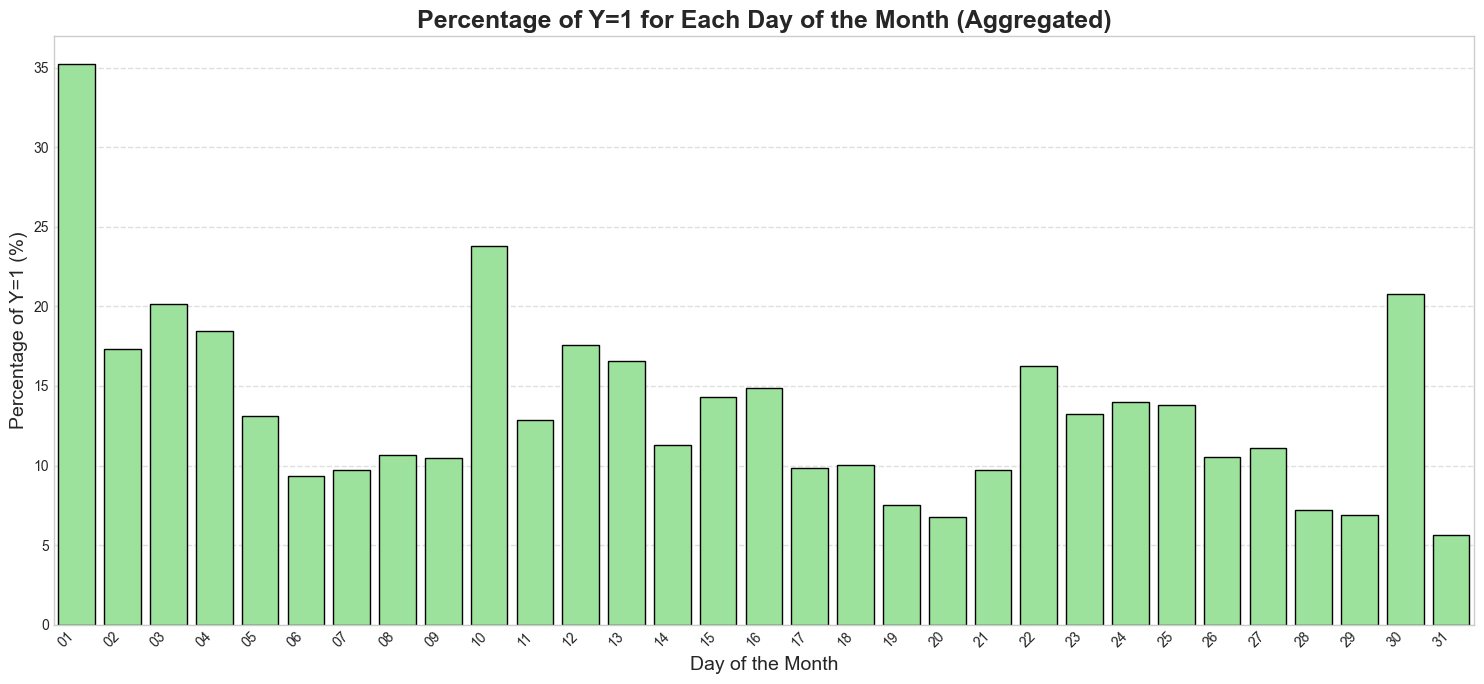


Second visualization has been generated.


In [38]:
# 5. Create a visualization of the percentage of y=1 for each day (ignoring month)
print("Step 5: Preparing data and creating visualization by day of the month...")
# Group by just the 'day' column and calculate the mean of 'y'.
day_only_percentage = df.groupby('day')['y'].mean().reset_index()
day_only_percentage['y'] = day_only_percentage['y'] * 100 # Convert to percentage

# The 'day' column is already a string like '01', '02', so it will sort correctly.
day_only_percentage = day_only_percentage.sort_values('day')

# --- Visualization 2: By Day of Month ---
plt.style.use('seaborn-v0_8-whitegrid')
fig2, ax2 = plt.subplots(figsize=(15, 7))

sns.barplot(
    x='day',
    y='y',
    data=day_only_percentage,
    ax=ax2,
    color='lightgreen',
    edgecolor='black'
)

# Improve the aesthetics and readability
ax2.set_title('Percentage of Y=1 for Each Day of the Month (Aggregated)', fontsize=18, fontweight='bold')
ax2.set_xlabel('Day of the Month', fontsize=14)
ax2.set_ylabel('Percentage of Y=1 (%)', fontsize=14)

plt.xticks(rotation=45, ha='right')
ax2.tick_params(axis='x', labelsize=10)
ax2.tick_params(axis='y', labelsize=10)
ax2.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)

plt.tight_layout()
plt.show()

print("\nSecond visualization has been generated.")

Step 6: Creating a correlation heatmap...


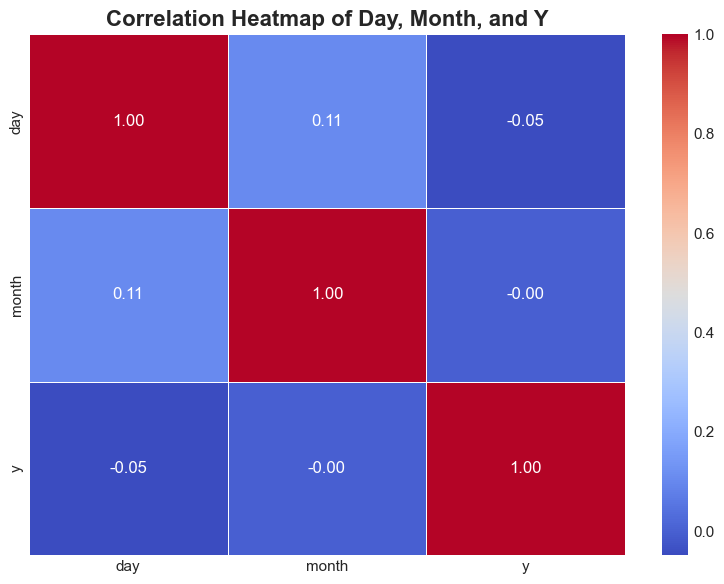


Third visualization (heatmap) has been generated.


In [39]:
# 6. Create a correlation heatmap for 'day', 'month', and 'y'
print("Step 6: Creating a correlation heatmap...")
# For correlation, we need numeric types. Let's create a copy of the relevant
# columns and convert them to integers.
corr_df = df[['day', 'month', 'y']].copy()
corr_df['day'] = corr_df['day'].astype(int)
corr_df['month'] = corr_df['month'].astype(int)

# Calculate the correlation matrix
correlation_matrix = corr_df.corr()

# --- Visualization 3: Correlation Heatmap ---
plt.style.use('seaborn-v0_8-whitegrid')
fig3, ax3 = plt.subplots(figsize=(8, 6))

sns.heatmap(
    correlation_matrix,
    annot=True,      # Display the correlation values on the heatmap
    cmap='coolwarm', # Use a color map that is good for correlations (diverging)
    fmt=".2f",       # Format the annotations to two decimal places
    linewidths=.5,
    ax=ax3
)

# Improve the aesthetics
ax3.set_title('Correlation Heatmap of Day, Month, and Y', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nThird visualization (heatmap) has been generated.")

Step 7: Creating visualization with 5-day bins...


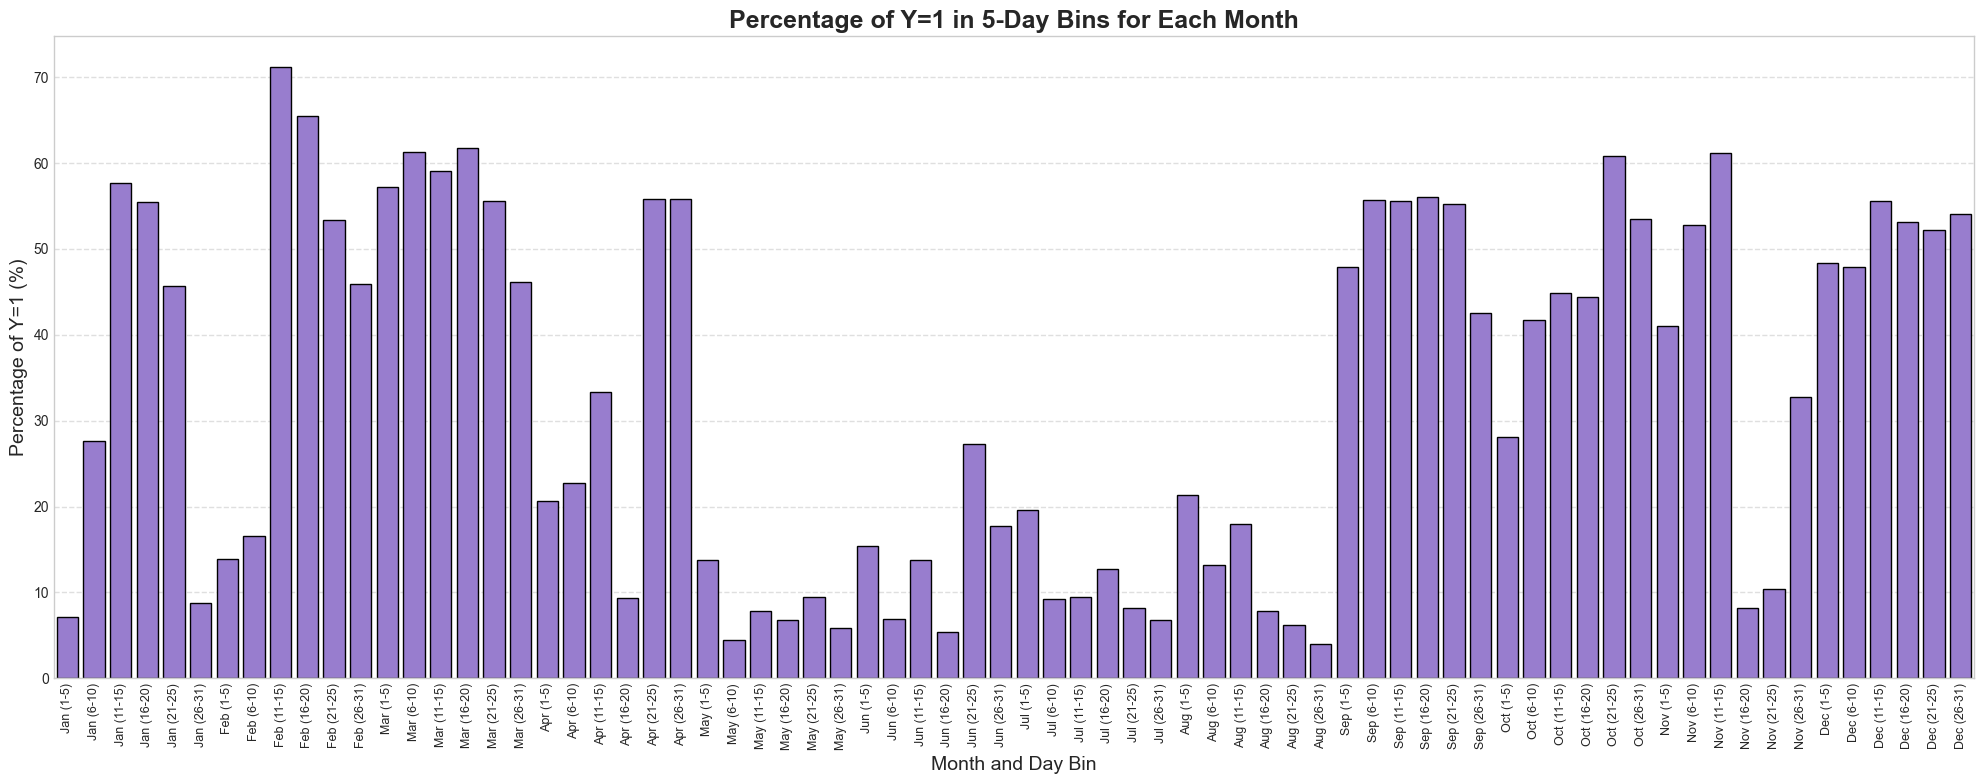


Fourth visualization (binned) has been generated.


In [40]:
# 7. Create a visualization with 5-day bins for each month
print("Step 7: Creating visualization with 5-day bins...")
# Create a copy to work with, ensuring 'day' is numeric for binning
binned_df = df.copy()
binned_df['day'] = binned_df['day'].astype(int)

# Define the bins and labels for the days of the month
bins = [0, 5, 10, 15, 20, 25, 31]
labels = ['1-5', '6-10', '11-15', '16-20', '21-25', '26-31']

# Create the 'day_bin' column using pandas.cut
binned_df['day_bin'] = pd.cut(binned_df['day'], bins=bins, labels=labels, right=True)

# Group by month and the new day_bin, then calculate the percentage of y=1
binned_percentage = binned_df.groupby(['month', 'day_bin'], observed=False)['y'].mean().reset_index()
binned_percentage['y'] = binned_percentage['y'] * 100

# Create a readable label for the x-axis
# First, a reverse map for month numbers to names
month_name_map = {v: k.capitalize() for k, v in month_map.items()}
binned_percentage['month_name'] = binned_percentage['month'].map(month_name_map)
binned_percentage['x_label'] = binned_percentage['month_name'] + ' (' + binned_percentage['day_bin'].astype(str) + ')'

# Sort the data chronologically for the plot
binned_percentage = binned_percentage.sort_values(['month', 'day_bin'])

# --- Visualization 4: Binned Chronological ---
plt.style.use('seaborn-v0_8-whitegrid')
fig4, ax4 = plt.subplots(figsize=(20, 8))

sns.barplot(
    x='x_label',
    y='y',
    data=binned_percentage,
    ax=ax4,
    color='mediumpurple',
    edgecolor='black'
)

# Improve the aesthetics and readability
ax4.set_title('Percentage of Y=1 in 5-Day Bins for Each Month', fontsize=18, fontweight='bold')
ax4.set_xlabel('Month and Day Bin', fontsize=14)
ax4.set_ylabel('Percentage of Y=1 (%)', fontsize=14)

plt.xticks(rotation=90, ha='center')
ax4.tick_params(axis='x', labelsize=9)
ax4.tick_params(axis='y', labelsize=10)
ax4.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)

plt.tight_layout()
plt.show()

print("\nFourth visualization (binned) has been generated.")


Step 8: Visualizing weekly trend of Y=1 percentage...


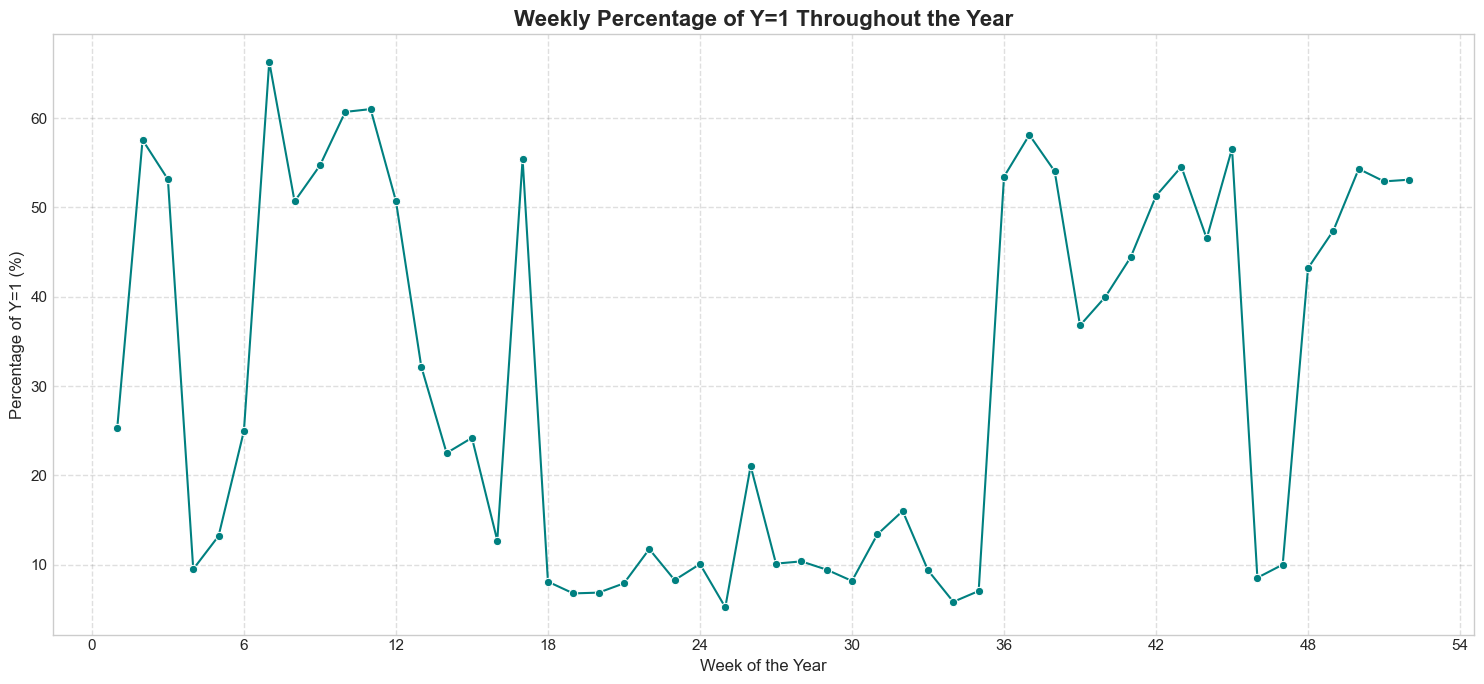


Fifth visualization (weekly trend) has been generated.


In [42]:
# 8. Visualize Weekly Percentage of Y=1
print("Step 8: Visualizing weekly trend of Y=1 percentage...")
# To get the week of the year, we first need a proper datetime object.
# We'll use a placeholder year (e.g., 2023) as it doesn't affect the week calculation.
# We need to handle invalid dates that might be created by our random data (e.g., Feb 30).
temp_df = df.copy()
temp_df['datetime_str'] = '2023-' + temp_df['month'] + '-' + temp_df['day']
temp_df['datetime'] = pd.to_datetime(temp_df['datetime_str'], errors='coerce')
temp_df = temp_df.dropna(subset=['datetime']) # Drop invalid dates

# Calculate the week of the year. Using isocalendar() is a robust way to get week numbers.
temp_df['week_of_year'] = temp_df['datetime'].dt.isocalendar().week

# Group by the week of the year and calculate the percentage of y=1
weekly_trend = temp_df.groupby('week_of_year')['y'].mean().reset_index()
weekly_trend['y'] = weekly_trend['y'] * 100 # Convert to percentage

# Sort by week of year for a clean line plot
weekly_trend = weekly_trend.sort_values('week_of_year')

# --- Visualization 5: Weekly Trend Line Graph ---
plt.style.use('seaborn-v0_8-whitegrid')
fig5, ax5 = plt.subplots(figsize=(15, 7))

# Plot the weekly trend as a line graph
sns.lineplot(
    x='week_of_year',
    y='y',
    data=weekly_trend,
    marker='o', # Add markers to each data point for clarity
    color='teal',
    ax=ax5
)

# Improve the aesthetics
ax5.set_title('Weekly Percentage of Y=1 Throughout the Year', fontsize=16, fontweight='bold')
ax5.set_xlabel('Week of the Year', fontsize=12)
ax5.set_ylabel('Percentage of Y=1 (%)', fontsize=12)
ax5.grid(True, linestyle='--', which='major', color='grey', alpha=.25)
# Set x-axis to show integer week numbers clearly
ax5.xaxis.set_major_locator(plt.MaxNLocator(integer=True))


plt.tight_layout()
plt.show()

print("\nFifth visualization (weekly trend) has been generated.")